1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from math import sqrt, pi, erf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize

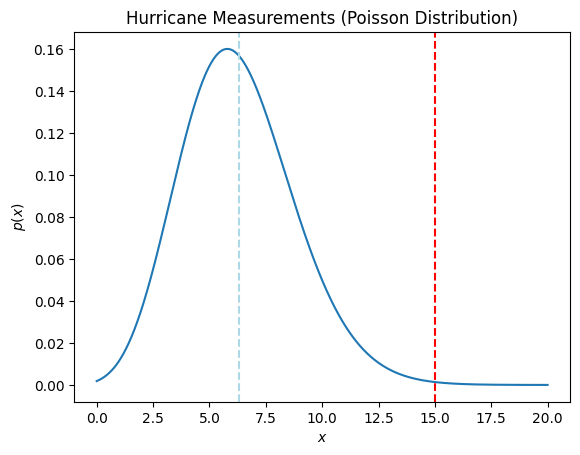

Z score =  1.380952380952381


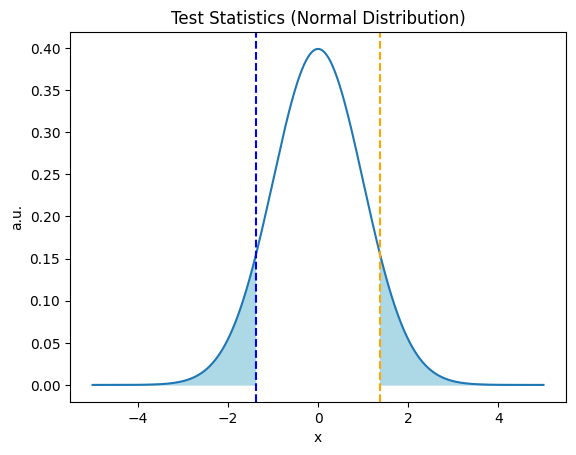

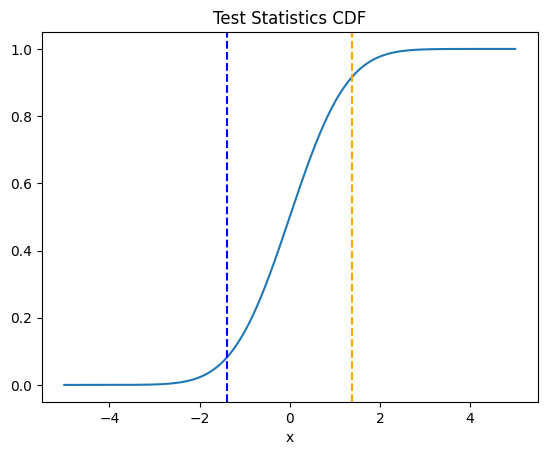

p-value:  0.1672936026551683 

We can accept the null hypothesis. The number of hurricanes in 2005 is not signficantly different from the distribution.



In [2]:
x0 = 15 #Number of Hurricanes in 2005
mu = 6.3 # Historic Average
alpha = 3. #Significance Level

#The Number of Hurricane is random and it follows a Poisson Distribution (assumption)
w = mu - x0
x = np.linspace(0, 20, 1000)
hurricanes = stats.poisson.pmf(x, mu)
varianza = stats.poisson.var(mu)
sigma_mu = varianza #o np.sqrt(varianza) ?

plt.plot(x,hurricanes)
plt.axvline(x0, linestyle = '--', color = 'red')
plt.axvline(mu, linestyle = '--', color = 'lightblue')
plt.title('Hurricane Measurements (Poisson Distribution)')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

#We are computing the Z score and p-value using the normal distribution (test statistics)
z = abs(x0 - mu) /sigma_mu #z-Score
print('Z score = ', z)
xs = np.linspace(-5, 5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs,ts,where=np.abs(xs) > np.abs(z), color = 'lightblue')
plt.axvline(z, linestyle = '--', color = 'orange')
plt.axvline(-z, linestyle = '--', color = 'blue')
plt.title('Test Statistics (Normal Distribution)')
plt.ylabel('a.u.')
plt.xlabel('x')
plt.show()

#Calculate the p-value through Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs,cs)
plt.axvline(z, linestyle = '--', color = 'orange')
plt.axvline(-z, linestyle = '--', color = 'blue')
plt.title('Test Statistics CDF')
plt.xlabel('x')
plt.show()

pvalue = stats.norm.cdf(-z) + (1. - stats.norm.cdf(z))
print('p-value: ', pvalue,'\n')

#Compare the p-value with the significance level
if pvalue < alpha:
    print('We can accept the null hypothesis. The number of hurricanes in 2005 is not signficantly different from the distribution.\n')
else:
    print('We cannot accept the null hypotesis. The number of hurricanes in 2005 is significantly different from the distribution.\n')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

t_test:  -3.6438559753116038


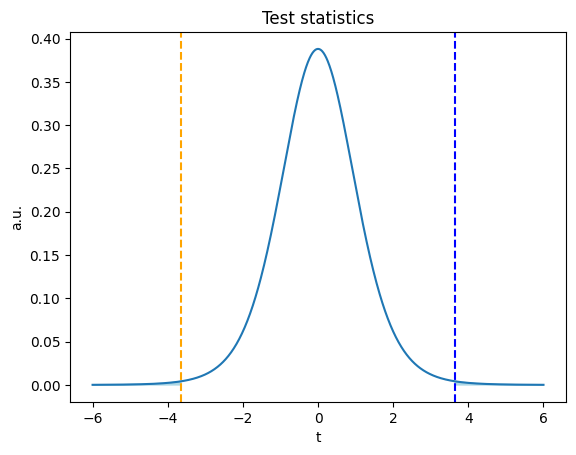

p-value = 0.0053685822360967465
Change in blood pressures within our sample was statistically significant


In [3]:
#Systolic Blood Pressure of the 10 subjects to the experiment
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100]) #pre-exposure : resting systolic blood pressure
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135]) #post-exposure systolic blood pressure
nsubj = len(pre) #number of subjects ( I know that it's 10)

#Let's consider a significant coefficient = 0.05
alpha = 0.05

#Calculate the varianze and its sqrt() for both the datasets
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=2))
#And compute the mean for both datasets
mean_pre = np.mean(pre)
mean_post = np.mean(post)

#Let's compute the test statistics
sigma = np.sqrt((sigma_pre**2 + sigma_post**2) / 2)
T = (mean_pre - mean_post) / (sigma*np.sqrt(2/nsubj))
print('t_test: ', T)

#Let's plot the Test Statistics and its pdf
xs = np.linspace(-6,+6,1000)
ts = stats.t.pdf(xs, nsubj - 1)
plt.plot(xs,ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

#Compute the p-value
pvalue = stats.t.cdf(T, nsubj - 1) + (1. - stats.t.cdf(-T, nsubj - 1))
print("p-value =", pvalue)
if pvalue < alpha:
    print('Change in blood pressures within our sample was statistically significant')
else:
     print('Change in blood pressures witing our sample was not statistically significant')   

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

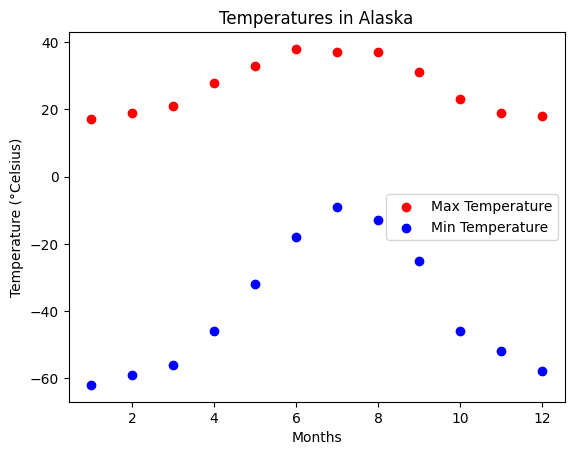

Curve Fitting of Tmax
Parameters Tmax:
 [10.58169954  0.59227424 27.94963534  2.30145898]
Covariance matrix Tmax:
 [[ 0.16816443 -0.00085886  0.00655269  0.00522756]
 [-0.00085886  0.00044872  0.00640273 -0.00296267]
 [ 0.00655269  0.00640273  0.18339726 -0.04203838]
 [ 0.00522756 -0.00296267 -0.04203838  0.02135829]]
A = 10.58 +- 0.41
f = 0.59 +- 0.02
Amplitude offset = 27.95 +- 0.43
Time offset = 2.30 +- 0.15 


Curve Fitting of Tmin
Parameters Tmin:
 [ 25.14962029   0.60132078 -36.71256964   1.99396708]
Covariance matrix Tmin:
 [[ 1.72807309e+00 -2.48182113e-04  1.89188126e-01 -3.66448665e-03]
 [-2.48182113e-04  5.30715722e-04  1.60003642e-02 -3.55963910e-03]
 [ 1.89188126e-01  1.60003642e-02  1.41860244e+00 -1.04189180e-01]
 [-3.66448665e-03 -3.55963910e-03 -1.04189180e-01  2.70520554e-02]]
A = 25.15 +- 1.31
f = 0.60 +- 0.02
Amplitude offset = -36.71 +- 1.19
Time offset = 1.99 +- 0.16 




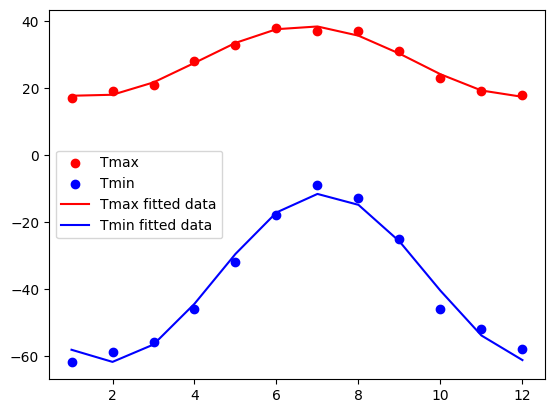

In [4]:
#Input Data: Max and Min Temperature for every month in Alaska
max_t = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#Plot 
plt.figure()
t = np.linspace(1,12,12)
plt.scatter(t,max_t, color = 'red', label = 'Max Temperature')
plt.scatter(t,min_t, color = 'blue', label = 'Min Temperature')
plt.title('Temperatures in Alaska')
plt.xlabel('Months')
plt.ylabel('Temperature (°Celsius)')
plt.legend(loc = 'best')
plt.show()

#Find a suitable function that can describe min and max temperatures
def f(time, A, freq, amplitudeoffset, phase):#, timeoffset):
    return amplitudeoffset + A*np.cos(freq*t + phase)# + timeoffset))

param_max,cov_max = optimize.curve_fit(f, t, max_t, [20,1,20,0])
param_min, cov_min = optimize.curve_fit(f,t,min_t, [50,1,-60,0])

print('Curve Fitting of Tmax')
print('Parameters Tmax:\n', param_max)
print('Covariance matrix Tmax:\n', cov_max)
print("A = %.2f +- %.2f" % (param_max[0], np.sqrt(cov_max[0,0])))
print("f = %.2f +- %.2f" % (param_max[1], np.sqrt(cov_max[1,1])))
print("Amplitude offset = %.2f +- %.2f" % (param_max[2], np.sqrt(cov_max[2,2])))
print("Time offset = %.2f +- %.2f" % (param_max[3], np.sqrt(cov_max[3,3])),'\n\n')

print('Curve Fitting of Tmin')
print('Parameters Tmin:\n', param_min)
print('Covariance matrix Tmin:\n', cov_min)
print("A = %.2f +- %.2f" % (param_min[0], np.sqrt(cov_min[0,0])))
print("f = %.2f +- %.2f" % (param_min[1], np.sqrt(cov_min[1,1])))
print("Amplitude offset = %.2f +- %.2f" % (param_min[2], np.sqrt(cov_min[2,2])))
print("Time offset = %.2f +- %.2f" % (param_min[3], np.sqrt(cov_min[3,3])),'\n\n')


#Plotting the results
plt.figure()
plt.scatter(t,max_t, color = 'red', label= 'Tmax')
plt.scatter(t,min_t, color = 'blue', label='Tmin')
plt.plot(t, param_max[2] + param_max[0]*np.cos(param_max[1]*t + param_max[3]), color = 'r',label='Tmax fitted data')
plt.plot(t, param_min[2] + param_min[0]*np.cos(param_min[1]*t + param_min[3]), color = 'b',label='Tmin fitted data')
plt.legend(loc='best')
plt.show()


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

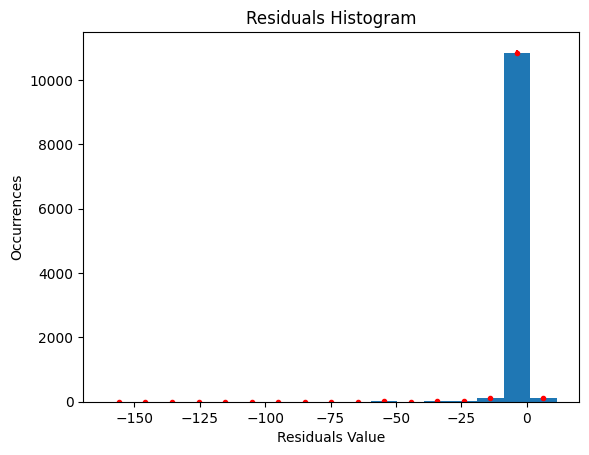

Histogram content:
 [1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 2.0000e+00 2.0000e+00 1.0000e+00 5.0000e+00 7.0000e+00 4.0000e+00
 1.0000e+01 1.7000e+01 1.1500e+02 1.0834e+04 1.3100e+02] 

Bin boundaries:
 [-160.85       -150.72235294 -140.59470588 -130.46705882 -120.33941176
 -110.21176471 -100.08411765  -89.95647059  -79.82882353  -69.70117647
  -59.57352941  -49.44588235  -39.31823529  -29.19058824  -19.06294118
   -8.93529412    1.19235294   11.32      ] 



In [7]:
## Importing and Reading the data
import pickle
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
nfile = 'data/residuals_261.pkl'
infile = open(nfile, 'rb')
data=np.load(nfile,allow_pickle=True).item()
data = pd.DataFrame(data, columns = ['residuals','distances'])
infile.close()
#data

## Creating the histogram of the residual feature
#In order to find the appropriate number of bins
valmax = max(data['residuals'])
valmin = min(data['residuals'])
#print(valmax, valmin)

nbins = 17
plt.figure()
h, bins, _ = plt.hist(data['residuals'], nbins, density = False)

## Setting the appropriate Poisson uncertantly
uncerts = np.sqrt(h)
bin_centers = 0.5*(bins[:-1]+bins[1:])

##Display everything
plt.errorbar(bin_centers, h, yerr = uncerts, fmt = 'r.')
plt.title('Residuals Histogram')
plt.xlabel('Residuals Value')
plt.ylabel('Occurrences')
plt.show()

print("Histogram content:\n", h,'\n')
print("Bin boundaries:\n", bins,'\n')

## 

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

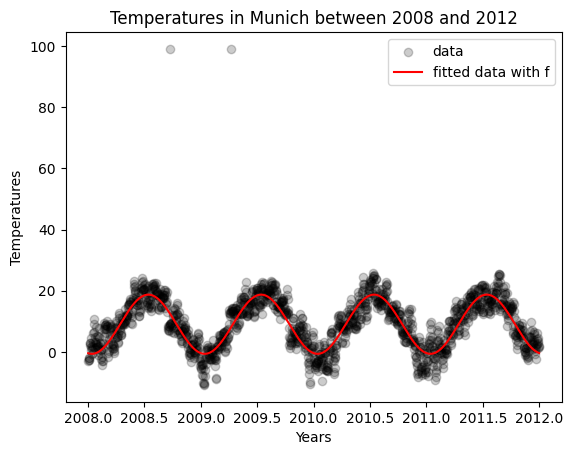

Best-fit parameters:
a =  -9.671276798582975 
b =  -0.2236532733795063 
c =  9.052562092760704 

Overall average temperature in Munich:  9.384097734976043
Daily average values predicted for the hottest time of the year:  18.72363852921597
Daily averae values predicted for the coldest time of the year:  -0.6187146999969411 



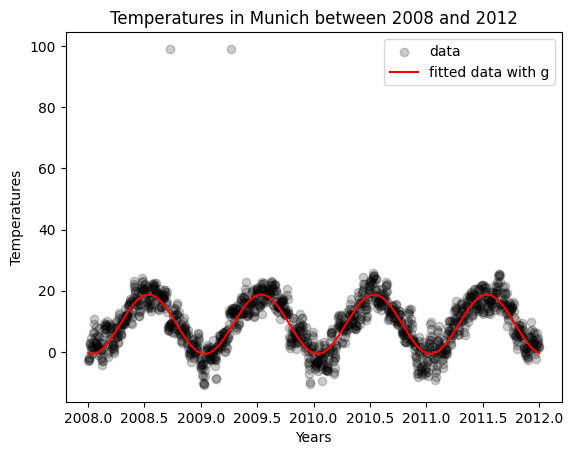

Best-fit parameters:
a =  -9.671613981050946 
b =  0.9997396593062227 
c =  15.62125365998422 
d =  9.05135225413025 

SSR of f:  234640.32493978916
SSR of g:  232886.4410955038 

Fisher F-score:  10.98029852205691
P-value: 0.001  additional parameter necessary:  YES




In [71]:
################ POINT 1 ####################

### Obtaining the Data

#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
fname = 'data/munich_temperatures_average_with_bad_data.txt'
#!cat data/munich_temperatures_average_with_bad_data.txt
date, temperature = np.loadtxt(fname, unpack=True)
columns = ['Temperature']
#data = pd.DataFrame(temperature, index = date, columns = ['Temperature']) 
data = pd.DataFrame({'Date': pd.Series(date),'Temperature' : pd.Series(temperature)})

### Defining the fit function and finding the fitting parameters
def f(time,a,b,c):
    return a*np.cos(2*np.pi*time + b) +c

param, pcov = optimize.curve_fit(f, date, temperature, p0 = [0,0,0])

## Make a plot of the data and the best-fit model in the range 2008 to 2012
#Let's only consider the data from 2008 to 2012 (included?)
data = data[data['Date'] >= 2008]
data = data[data['Date'] < 2012]

#time = np.linspace(2008,2012, len(data)) #not necessary
plt.figure()
plt.scatter(data['Date'], data['Temperature'], color = 'black', alpha = 0.2, label = 'data')
plt.plot(data['Date'], param[0]*np.cos(2*np.pi*data['Date'] + param[1]) + param[2], color ='red', label = 'fitted data with f')
plt.xlabel('Years')
plt.ylabel('Temperatures')
plt.title('Temperatures in Munich between 2008 and 2012')
plt.legend(loc = 'best')
plt.show()

#What are the best-fit values of the parameters?
print('Best-fit parameters:\na = ', param[0],'\nb = ', param[1],'\nc = ', param[2],'\n')

#What is the overall average temperature in Munich, and what are the typical daily 
#average values predicted by the model for the coldest and hottest time of year?
average_temperature = np.mean(data['Temperature'])
print('Overall average temperature in Munich: ', average_temperature)
daily_average_hot = max(f(data['Date'], param[0], param[1], param[2]))
daily_average_cold = min(f(data['Date'], param[0], param[1], param[2]))
print('Daily average values predicted for the hottest time of the year: ', daily_average_hot)
print('Daily averae values predicted for the coldest time of the year: ', daily_average_cold, '\n')

#What is the meaning of the  𝑏 parameter, and what physical sense does it have?

############ POINT 2 ########################

## Fitting the data with a function g(x) with one more parameter than f(x)
def g(time, a,b,c,d):
    return a*np.cos(2*np.pi*time*b + c) + d

paramg, gcov = optimize.curve_fit(g, date, temperature)

plt.figure()
plt.scatter(data['Date'], data['Temperature'], color = 'black', alpha = 0.2, label = 'data')
plt.plot(data['Date'], paramg[0]*np.cos(2*np.pi*data['Date']*paramg[1] + paramg[2]) + paramg[3], color ='red', label = 'fitted data with g')
plt.xlabel('Years')
plt.ylabel('Temperatures')
plt.title('Temperatures in Munich between 2008 and 2012')
plt.legend(loc = 'best')
plt.show()

print('Best-fit parameters:\na = ', paramg[0],'\nb = ', paramg[1],'\nc = ', paramg[2],'\nd = ', paramg[3],'\n')

## Computing the RSS for both the fitting with f and g
SSRf = (sum(data['Temperature'] - f(data['Date'], param[0], param[1], param[2]))**2)
SSRg = (sum(data['Temperature'] - g(data['Date'], paramg[0], paramg[1], paramg[2], paramg[3]))**2)
n1 = len(param) - 1
n2 = len(paramg) - 1
print('SSR of f: ', SSRf)
print('SSR of g: ', SSRg, '\n')

##Using the Fisher F-test to see if the use of an additional parameter is motivated
alpha = 0.05

def Ftest(SSR1, SSR2, n1, n2, nbins, verbose = False):
    F = (((SSR1 - SSR2)/(n2 - n1))/(SSR2/(nbins - n2)))
    pval = 1. - stats.f.cdf(F, n2 - n1, nbins - n2)
    if verbose:
        print('Fisher F-score: ', F)
        print('P-value: %.3f' %pval, ' additional parameter necessary: ', 'YES' if pval < alpha else 'NO')
    return F, pval

F, pval = Ftest(SSRf, SSRg, n1, n2, len(data), verbose = True)
print('\n')